In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
titanic_df = sns.load_dataset('titanic')
titanic_df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


# EDA

In [11]:
titanic_df.dtypes.value_counts()

,count
object,5
int64,4
float64,2
bool,2
category,1
category,1


In [4]:
titanic_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [12]:
columns_to_drop = ['fare','embarked','class','who','adult_male','deck','embark_town','alive','alone']
titanic_df.drop(columns_to_drop,axis='columns',inplace=True)
titanic_df

,survived,pclass,sex,age,sibsp,parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,NaN,1,2
889,1,1,male,26.0,0,0


In [13]:
titanic_df.shape

(891, 6)

In [14]:
titanic_df.dropna()

,survived,pclass,sex,age,sibsp,parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
885,0,3,female,39.0,0,5
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
889,1,1,male,26.0,0,0


#CODIFICACIÓN DE VARIABLES CATEGORICAS

In [15]:
titanic_df.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64


In [16]:
titanic_df = pd.get_dummies(titanic_df,columns=['sex'],drop_first=True)
titanic_df.head()

,survived,pclass,age,sibsp,parch,sex_male
0,0,3,22.0,1,0,True
1,1,1,38.0,1,0,False
2,1,3,26.0,0,0,False
3,1,1,35.0,1,0,False
4,0,3,35.0,0,0,True


In [17]:
titanic_df['sex_male'] = titanic_df['sex_male'].astype(int)
titanic_df.rename(columns = {'sex_male':'sex'},inplace=True)
titanic_df.head(10)

,survived,pclass,age,sibsp,parch,sex
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1
5,0,3,NaN,0,0,1
6,0,1,54.0,0,0,1
7,0,3,2.0,3,1,1
8,1,3,27.0,0,2,0
9,1,2,14.0,1,0,0


# PREPARACIÓN DE DATOS PARA EL ENTRENAMIENTO

In [18]:
from sklearn.model_selection import train_test_split
X = titanic_df.drop("survived",axis=1)
y = titanic_df['survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=00000)

## PARAMETROS PARA ENTRENAMIENTO DE ARBOL DE DECISIÓN

## SIN PARAMETROS

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree1 = DecisionTreeClassifier()
tree1.fit(X_train,y_train)
y_pred = tree1.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy TREE 1 : {accuracy}')

Accuracy TREE 1 : 0.7932960893854749


## 1. Profundidad del árbol (max_depth)

Controla cuán profundo puede crecer el árbol. Un árbol muy profundo puede sobreajustarse a los datos de entrenamiento, mientras que un árbol muy poco profundo puede ser subajustado.

In [28]:
tree2 = DecisionTreeClassifier(max_depth=4)
tree2.fit(X_train,y_train)
y_pred = tree2.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy TREE 2 : {accuracy}')

Accuracy TREE 2 : 0.8212290502793296


## 2. Número mínimo de muestras por división (min_samples_split)

Determina el número mínimo de muestras que debe tener un nodo antes de dividirse. Un valor más alto reduce el sobreajuste.

In [35]:
tree3 = DecisionTreeClassifier(min_samples_split=13)
tree3.fit(X_train,y_train)
y_pred = tree3.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy TREE 3 : {accuracy}')

Accuracy TREE 3 : 0.8324022346368715


## 3. Número mínimo de muestras por hoja (min_samples_leaf)

Define el número mínimo de muestras que puede tener una hoja. Un valor más alto evita que el árbol aprenda patrones muy específicos (ruido).

In [41]:
tree4 = DecisionTreeClassifier(min_samples_leaf=5)
tree4.fit(X_train,y_train)
y_pred = tree4.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy TREE 4 : {accuracy}')

Accuracy TREE 4 : 0.8547486033519553


## 4. Criterio de división (criterion)

* gini (por defecto): mide la impureza de Gini(es una medida utilizada en los árboles de decisión para evaluar la calidad de una partición de datos en los nodos).
* entropy: usa la ganancia de información para las divisiones.

In [49]:
tree5 = DecisionTreeClassifier(criterion='entropy')
tree5.fit(X_train,y_train)
y_pred = tree5.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy TREE 5 : {accuracy}')

Accuracy TREE 5 : 0.8100558659217877


# EVALUANDO LA MEJOR COMBINACIÓN DE PARAMETROS

In [43]:
from sklearn.model_selection import GridSearchCV

# definirmos varios parametros
param_grid = {
    'max_depth': [3,4,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'criterion':['gini','entropy']
}

clf = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(clf,param_grid,cv=5,scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train,y_train)

print("Mejores parametros : ",grid_search.best_params_)

Mejores parametros :  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


# ENTRENAMIENTO DEL MODELO CON LOS MEJORES PARAMETROS

In [44]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy best model : {accuracy}')

Accuracy best model : 0.8212290502793296


# VERIFICAR LA VARIABLE MAS IMPORTANTE

In [45]:
importances = best_model.feature_importances_
importances

array([0.16483424, 0.13981761, 0.10906073, 0.00522481, 0.58106261])

In [46]:
columns = X.columns
columns

Index(['pclass', 'age', 'sibsp', 'parch', 'sex'], dtype='object')

<ipython-input-47-252b376f9a70>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columns,y=importances,palette='bright',saturation= 2.0,edgecolor='black',linewidth=2)


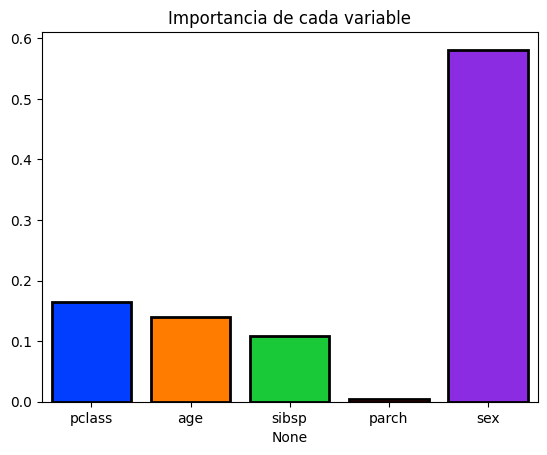

In [47]:
sns.barplot(x=columns,y=importances,palette='bright',saturation= 2.0,edgecolor='black',linewidth=2)
plt.title('Importancia de cada variable')
plt.show()

# VERIFICAR EL PUNTO EN EL CUAL SE ESTARIA CAYENDO EN SOBREAJUSTE

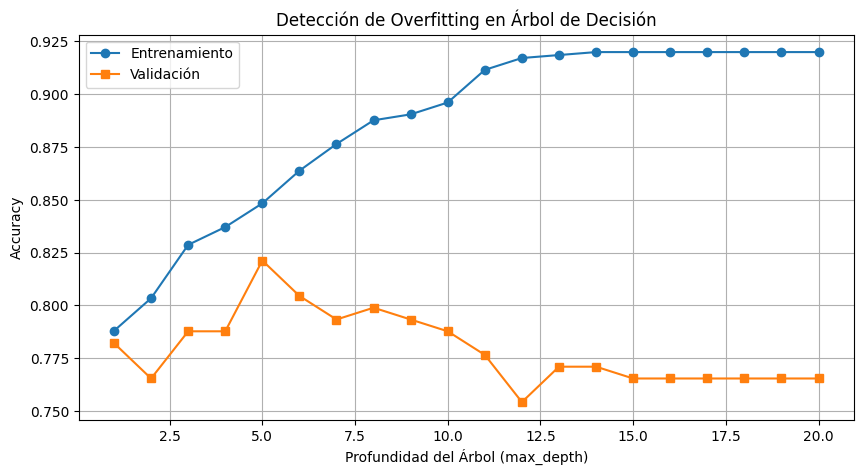

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Datos (usamos X, y de tu dataset)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

train_scores = []
val_scores = []
max_depths = range(1, 21)  # Profundidades de 1 a 20

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    # Evaluamos en los conjuntos de entrenamiento y validación
    train_acc = accuracy_score(y_train, model.predict(X_train))
    val_acc = accuracy_score(y_val, model.predict(X_val))

    train_scores.append(train_acc)
    val_scores.append(val_acc)

# Graficamos las curvas de accuracy
plt.figure(figsize=(10, 5))
plt.plot(max_depths, train_scores, label="Entrenamiento", marker='o')
plt.plot(max_depths, val_scores, label="Validación", marker='s')
plt.xlabel("Profundidad del Árbol (max_depth)")
plt.ylabel("Accuracy")
plt.title("Detección de Overfitting en Árbol de Decisión")
plt.legend()
plt.grid(True)
plt.show()